In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df =pd.read_csv("Scholarship.csv")

In [3]:
df1 =df.copy()

In [4]:
df1.head()

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0


In [5]:
df1.shape

(1000, 3)

C:\Users\abcma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\abcma\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


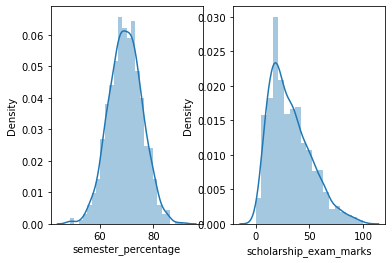

In [6]:
plt.subplot(1,2,1)
sns.distplot(df1["semester_percentage"])
plt.subplot(1,2,2)
sns.distplot(df1["scholarship_exam_marks"])
plt.show()

In [7]:
mean = df1["semester_percentage"].mean()
std =df1["semester_percentage"].std()

In [8]:
print(mean ,"," ,std)

69.61240000000004 , 6.158978751323897


In [9]:
highest_allowed = mean +3 *std
lowest_allowed =mean -3 *std
print(highest_allowed , ",", lowest_allowed)

88.08933625397172 , 51.13546374602835


In [10]:
df1[(df1["semester_percentage"]< lowest_allowed )|( df1["semester_percentage"]> highest_allowed)] 

,semester_percentage,scholarship_exam_marks,got_scholarship
485,49.2,44,1
995,88.7,44,1
996,91.2,65,1
997,48.9,34,0
999,49.0,10,1


## trimming (removing outliers)

In [11]:
df1[(df1["semester_percentage"]>lowest_allowed) & (df1["semester_percentage"]<highest_allowed)]

,semester_percentage,scholarship_exam_marks,got_scholarship
0,71.9,26,1
1,74.6,38,1
2,75.4,40,1
3,64.2,8,1
4,72.3,17,0
...,...,...,...
991,70.4,57,0
992,62.6,12,0
993,67.3,21,1
994,64.8,63,0


In [12]:
df1['z_score'] = (df1["semester_percentage"]-df1["semester_percentage"].mean())/df1["semester_percentage"].std()

In [13]:
df1.head()

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
0,71.9,26,1,0.371425
1,74.6,38,1,0.809810
2,75.4,40,1,0.939701
3,64.2,8,1,-0.878782
4,72.3,17,0,0.436371


In [14]:
df1[(df1['z_score']<-3)|(df1['z_score']>3)]

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
485,49.2,44,1,-3.314251
995,88.7,44,1,3.099150
996,91.2,65,1,3.505062
997,48.9,34,0,-3.362960
999,49.0,10,1,-3.346724


In [16]:
df1[(df1['z_score']>-3)& (df1['z_score']<3)]

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
0,71.9,26,1,0.371425
1,74.6,38,1,0.809810
2,75.4,40,1,0.939701
3,64.2,8,1,-0.878782
4,72.3,17,0,0.436371
...,...,...,...,...
991,70.4,57,0,0.127878
992,62.6,12,0,-1.138565
993,67.3,21,1,-0.375452
994,64.8,63,0,-0.781363


## capping               
instead of removing rows with outliers 

In [17]:
upper_limit =mean+3*std
lower_limit =mean-3*std

In [25]:
df1["semester_percentage"] = np.where(df1["semester_percentage"]>upper_limit,upper_limit,
                            np.where(df1["semester_percentage"]<lower_limit,lower_limit,df["semester_percentage"]))

In [26]:
df1

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
0,71.900000,26,1,0.371425
1,74.600000,38,1,0.809810
2,75.400000,40,1,0.939701
3,64.200000,8,1,-0.878782
4,72.300000,17,0,0.436371
...,...,...,...,...
995,88.089336,44,1,3.099150
996,88.089336,65,1,3.505062
997,51.135464,34,0,-3.362960
998,86.200000,46,1,2.693239


In [28]:
df1[(df1["semester_percentage"]<lowest_allowed) & (df1["semester_percentage"]>highest_allowed)]

,semester_percentage,scholarship_exam_marks,got_scholarship,z_score
